In [47]:
# %matplotlib widget #requires package ipympl installed, for interactive plots.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import lmfit

from scipy.optimize import curve_fit

np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display of arrays.

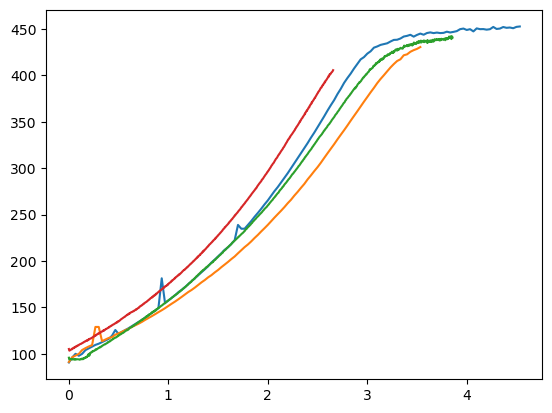

In [55]:
first_frame = 1

# name = "test1"

for name in ['test1', 'test2', 'test3', 'test4']:
# data = pd.read_csv("meas1_c.mqa", sep="\t", decimal=',')
    data = pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Tracked Data\\"+ name + ".mqa", sep="\t", decimal=',')

    time = data['Time'].astype(float)
    y_position = data['Point #1.Y'].astype(float)
    plt.plot(time, y_position)


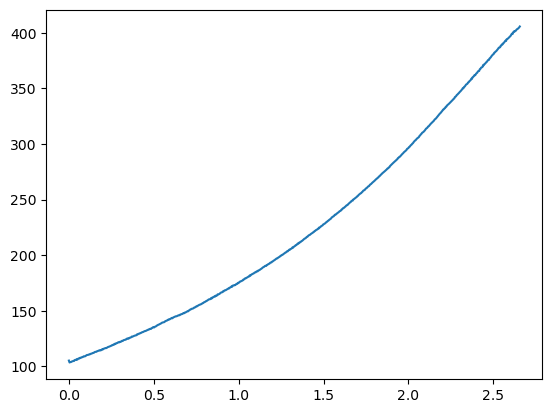

In [49]:
plt.plot(time,y_position)




In [50]:
def lengte_y(y_position):
    for idx, y in enumerate(y_position):
        if not y>-10000:
            return idx

In [51]:
index = lengte_y(y_position)
time = time[:index]
y_position = y_position[:index]
print(index)

None


In [52]:
def slope(t, D):
    placeholder = D*np.sqrt(t)
    return placeholder

In [53]:
params, covariance = curve_fit(slope, time, y_position)
print(params)


[208.0159]


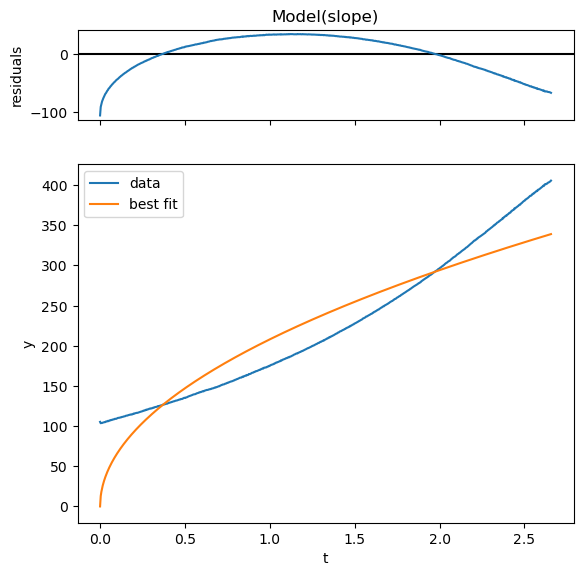

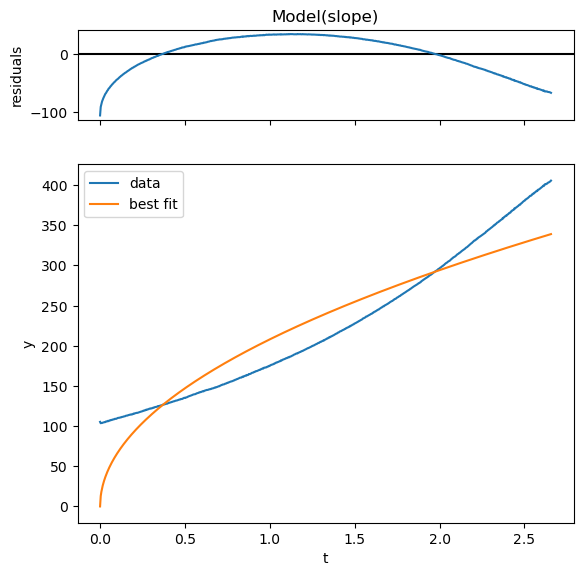

In [54]:
model = lmfit.Model(slope)
parameters = model.make_params(D=30)
result = model.fit(y_position, parameters, t=time)
result.plot(datafmt='-')